In [1]:
# Importing Qiskit
from qiskit import *

In [2]:
# Creating Quantum and Classical Registers
quantum_register= QuantumRegister(2)
classical_register= ClassicalRegister(2)

In [3]:
# Creating a Quantum Circuit
quantum_circuit= QuantumCircuit(quantum_register, classical_register)

In [4]:
# To view the circuit
quantum_circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [5]:
# Adding X Gate to the circuit
# The 0 indicates the 'q0' register
quantum_circuit.cx(0,1)

# Draw the circuit again
quantum_circuit.draw()

q0_0: ──■──
      ┌─┴─┐
q0_1: ┤ X ├
      └───┘
c0: 2/═════

In [6]:
# Now we have to measure this to see how the gate works
# 0,0 defines quantum register 0 (q0) to classical register 0 (c0)
quantum_circuit.measure(0,0)
quantum_circuit.measure(1,1)
quantum_circuit.draw()

┌─┐   
q0_0: ──■──┤M├───
      ┌─┴─┐└╥┘┌─┐
q0_1: ┤ X ├─╫─┤M├
      └───┘ ║ └╥┘
c0: 2/══════╩══╩═
            0  1

In [7]:
# As we can see, the circuit now has a X Gate. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBM (IBM's quantum computer)
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='4474ad1e-b379-48e1-8391-c7a7db7adf69', job_id='b94edd21-c3b6-40b0-b9aa-76dbe555c7a3', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1024}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-87', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, seed_simulator=2035579388, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.001131, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 20, 'fusion': {'enabled': False}}, time_taken=0.0032951)], date=2023-03-08T16:33:25.238665, status=COMPL

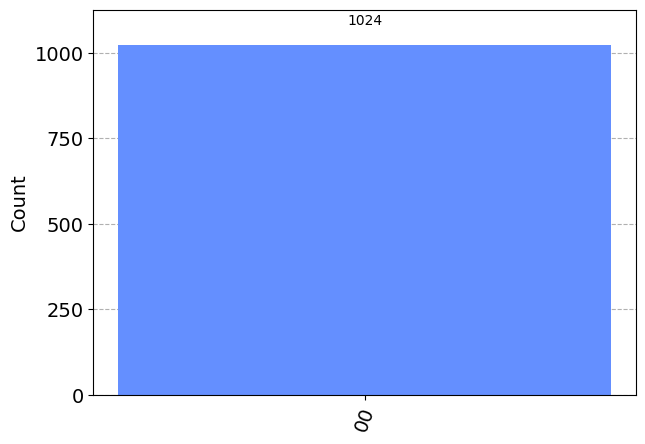

In [8]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)

In [9]:
# Let us see the counts
print(counts)

{'00': 1024}


In [10]:
# All the tries have turned out to be 1, so the X Gate worked. The input 0 is turned into 1.

In [11]:
# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import IBMQ

# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

In [12]:
# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])

C:\Users\abhis\AppData\Local\Temp\ipykernel_36628\1664362228.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\abhis\AppData\Local\Temp\ipykernel_36628\1664362228.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


['ibmq_qasm_simulator', 'ibmq_lima', 'ibmq_belem', 'ibmq_quito', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibmq_jakarta', 'ibmq_manila', 'ibm_lagos', 'ibm_nairobi', 'ibm_perth', 'ibm_oslo']


In [13]:
# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(quantum_circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()

Job Status: job is queued (5)     

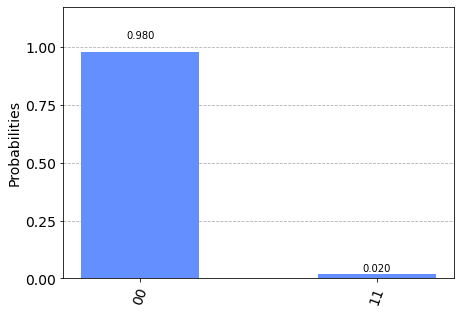

In [ ]:
# Plot histogram of the outputs recieved.
counts = results.get_counts(quantum_circuit)
plot_histogram(counts)